In [34]:
import scipy.optimize as sp_o
import numpy as np


def nash_equilibrium(A):
    n=len(A)
    m=len(A[0])
    
    A=np.array(A)
    # Шаг1: проверка на наличие седловой точки у матрицы выигрыша
    max_col = A.max(axis=0)
    min_row = A.min(axis=1)
    maximin = max(min_row)
    minimax = min(max_col)
    
    if maximin == minimax: 
        
        # Если седловая точка есть, то есть решение в чистых стратегиях, 
        # и нам нужно просто проставить единицы в соотвествующие ячейки массивов стратегий игроков
        
        min_row = A.min(axis=1)
        max_col = A.max(axis=0)
        v = maximin
        for i in range(n):
            for j in range(m):
                if min_row[i] == maximin and max_col[j] == minimax:
                    Ans_x = np.zeros(n)
                    Ans_x[i] = 1
                    Ans_y = np.zeros(m)
                    Ans_y[j] = 1
    else:
        
        # Если седловой точки нет, то записываем две двойственные задачи линейного программирования,
        #     которые решаются функцией scipy.optimize.linprog(...). 
        
        c = []
        b = []
        for i in range(n):
            c.append(1)
        for i in range(m):
            b.append(-1)
        
        add_cost = abs(A.min())
        A += add_cost
        
        # Примечание: ниже используется функция transpose библиотеки numpy. 
        # Она "некорректно" (не так, как нам надо) работает с одномерными массивами.
        # Необходимо заметить, что у одномерной матрицы выигрыша ВСЕГДА существует седловая точка,
        #     поэтому в данном случае применение transpose корректно.
        
        A = np.transpose(A)
        res1 = sp_o.linprog(c, A_ub=(-1)*A, b_ub=b, options={"disp": True})
        A = np.transpose(A)
        res2 = sp_o.linprog(b, A_ub=A, b_ub=c, options={"disp": True})
        v = 1 / (res1.fun)
        Ans_x = abs(v) * res1.x
        Ans_y = abs(v) * res2.x
        v -= add_cost
        
    # Возвращаем список из двух стратегий игроков и цены игры
    
    return [Ans_x, Ans_y, v]


def draw(dist):
    plot.xlim([0, len(dist)+1])
    plot.ylim([0, np.max(dist)+1])
    for i in range(len(dist)):
        plot.scatter(i+1, dist[i])
        plot.plot([i+1, i+1], [0, dist[i]])
    plot.show()
    
def representation(matrix):
    res = nash_equilibrium(matrix)
    print("Цена игры = ", res[2])
    print("Массив стратегии первого игрока : ", res[0])
    draw(res[0])
    print("Массив стратегии второго игрока ", res[1])
    draw(res[1])    
    


Cпектр оптимальной стратегии состоит из одной точки (т.е. существует равновесие Нэша в чистых стратегиях)

Цена игры =  3
Массив стратегии первого игрока :  [ 0.  1.]


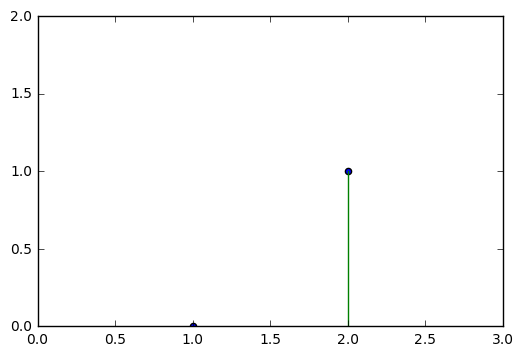

Массив стратегии второго игрока  [ 1.  0.]


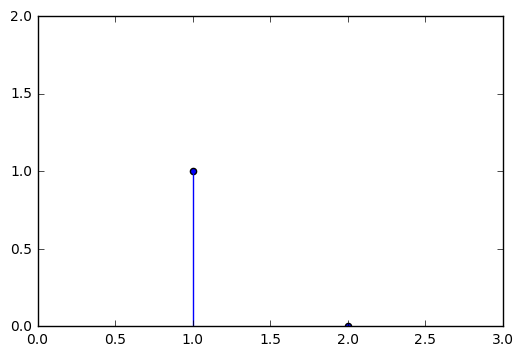

In [32]:
mat = [[1, 2],
       [3, 4]]
representation(mat)

Cпектр оптимальной стратегии неполон (т.е. некоторые чистые стратегии не используются)

Optimization terminated successfully.
         Current function value: 0.363636    
         Iterations: 3
Optimization terminated successfully.
         Current function value: -0.363636   
         Iterations: 2
Цена игры =  1.75
Массив стратегии первого игрока :  [ 0.75  0.25]


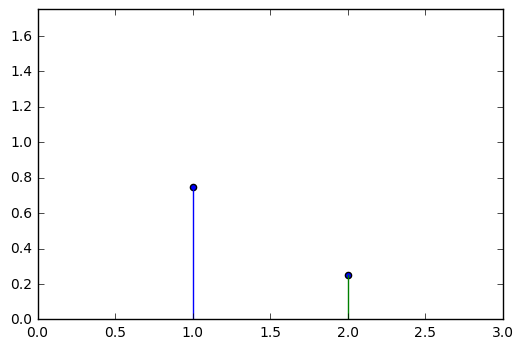

Массив стратегии второго игрока  [ 0.25  0.75  0.  ]


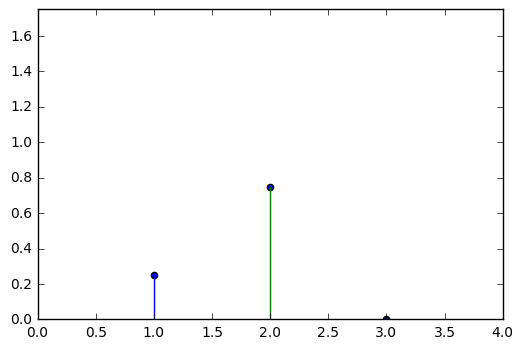

In [33]:
mat = [[1, 2, 3],
       [4, 1, 2]]
representation(mat)

Cпектр оптимальной стратегии полон

Optimization terminated successfully.
         Current function value: 1.000000    
         Iterations: 3
Optimization terminated successfully.
         Current function value: -1.000000   
         Iterations: 3
Цена игры =  1.0
Массив стратегии первого игрока :  [ 0.33333333  0.33333333  0.33333333]


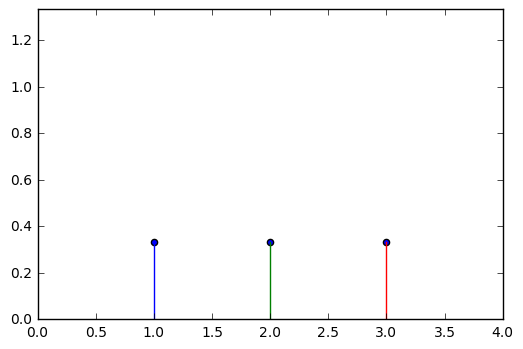

Массив стратегии второго игрока  [ 0.33333333  0.33333333  0.33333333]


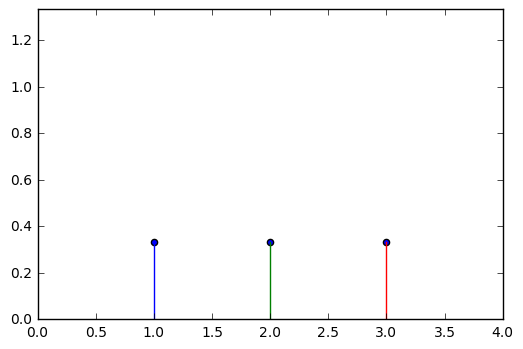

In [35]:
mat = [[2, 0, 1],
       [1, 2, 0],
       [0, 1, 2]]
representation(mat)